# Homework 6
You need to classify digits with SVM models in this homework. Use PCA to reduce data dimensionality (80% information remain). Compare performance of linear, radial, and polynomial kernals. Tune kernal parameters using Randomsearch method.


Training Linear SVM model...


/Users/zacharycervenka/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters for Linear SVM: {'C': 1.0}

Classification Report for Linear SVM:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      0.96      0.95        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.94      0.96        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       0.93      0.90      0.92        30
           9       0.93      0.97      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360

Cross-validation scores for Linear SVM: [0.97222222 0.95138889 0.94773519 0.97560976 0.95470383]
Average Cross-validation score for Linear SVM: 0.9603319

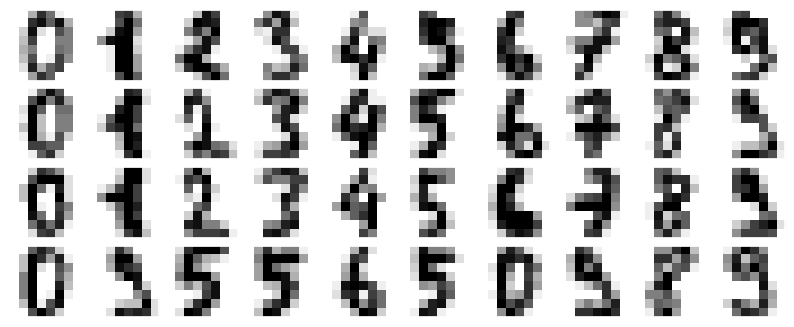

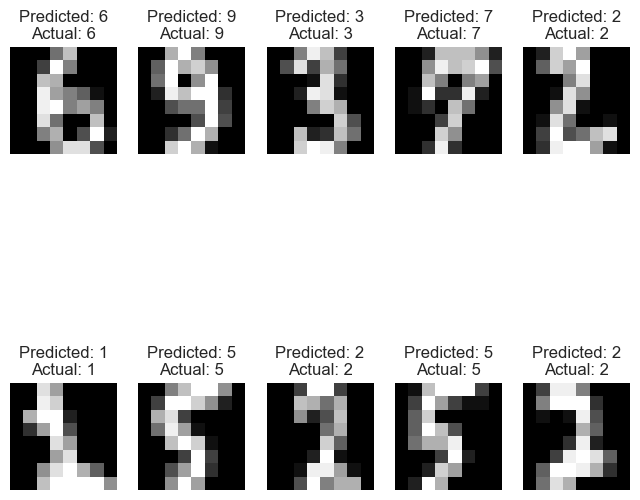

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.decomposition import PCA

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Perform PCA to reduce dimensionality while retaining 80% information
pca = PCA(n_components=0.8, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define the SVM models with different kernels
svm_models = {
    'Linear': {'model': svm.SVC(kernel='linear'), 'param_dist': {'C': np.logspace(-3, 3, 7)}},
    'Radial': {'model': svm.SVC(kernel='rbf'), 'param_dist': {'C': np.logspace(-3, 3, 7), 'gamma': np.logspace(-3, 3, 7)}},
    'Polynomial': {'model': svm.SVC(kernel='poly'), 'param_dist': {'C': np.logspace(-3, 3, 7), 'degree': [2, 3, 4]}}
}

# Train and evaluate each SVM model
for kernel, config in svm_models.items():
    print(f"\nTraining {kernel} SVM model...")

    # Use RandomizedSearchCV to find the best hyperparameters
    random_search = RandomizedSearchCV(config['model'], config['param_dist'], n_iter=10, cv=5, random_state=42)
    random_search.fit(X_train_pca, y_train)

    # Print the best hyperparameters
    print(f"Best hyperparameters for {kernel} SVM: {random_search.best_params_}")

    # Predict on the test set
    y_pred = random_search.predict(X_test_pca)

    # Display classification report
    print(f"\nClassification Report for {kernel} SVM:\n")
    print(metrics.classification_report(y_test, y_pred))

    # Get cross-validation scores
    cv_scores = cross_val_score(random_search.best_estimator_, X_train_pca, y_train, cv=5)
    print(f"Cross-validation scores for {kernel} SVM: {cv_scores}")
    print(f"Average Cross-validation score for {kernel} SVM: {np.mean(cv_scores)}")

# Visualize some test digits and their predictions for the best-performing SVM model
best_model = random_search.best_estimator_
best_model_predictions = best_model.predict(X_test_pca)
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f'Predicted: {best_model_predictions[i]}\nActual: {y_test[i]}')
    plt.axis('off')
plt.show()